In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt

# 유저별 KT 정답률

In [2]:
raw_data = pd.read_csv("/opt/ml/input/data/FE_total_data.csv")
user_info = raw_data.pivot_table("answerCode","userID","KnowledgeTag").fillna(0) # 아예 풀지 않은 문제들은 2로 채움
user_info_np = user_info.to_numpy()

In [3]:
model = TSNE(n_components=2) # n_componenets : 결과 data point의 차원
# 대략 5~30초 사이 소요
result = model.fit_transform(user_info_np) #user_info_np

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


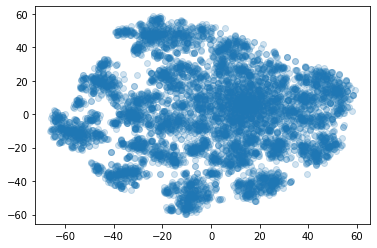

In [4]:
fig, ax = plt.subplots()
ax = plt.scatter(result[:,0],result[:,1], alpha=0.2)
plt.show()

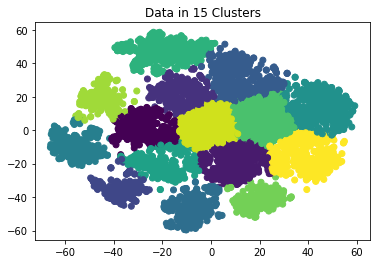

In [10]:
number_of_clusters=15
kmeans = KMeans(n_clusters=number_of_clusters,random_state=0).fit(result)
y_pred=kmeans.predict(result)

plt.scatter(result[:, 0], result[:, 1], c=y_pred)
plt.title("Data in " + str(number_of_clusters) + " Clusters")
plt.show()

In [12]:
label=kmeans.labels_
print(len(result))
print(len(label))
print(label[:10])
print(len(pd.unique(raw_data['userID'])))
kt_cluster_dict=dict()
userID=pd.unique(raw_data['userID']).tolist()
for i in range(len(userID)):
    kt_cluster_dict[userID[i]]=label[i]

7442
7442
[ 3  5  6 12  2  8  5 12  9  5]
7442


In [13]:
raw_data = pd.read_csv("/opt/ml/input/data/FE_total_data.csv")
def labeling(x):
    return kt_cluster_dict[x]
raw_data['tagCluster']=raw_data['userID'].apply(labeling)
raw_data.head()
raw_data.to_csv('/opt/ml/input/data/FE/tagCluster.csv')